<a href="https://colab.research.google.com/github/aysckmk/BLPS254/blob/main/CAPSTONEFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [206]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [207]:
DATA_DIR = './DATA_DIR'

In [208]:
df = pd.read_csv(DATA_DIR + '/data.csv')


# Dataset Descriptions 

In [209]:
    display(df.head(10))
    display(df.describe)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


<bound method NDFrame.describe of         valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                            

# EDA

In [210]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [212]:
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)

df['duration_min'].head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [213]:
df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [214]:
df.duplicated().any().sum()

0

In [215]:
df[(df['artists'] == "Billie Holiday") & (df['name']== "No Regrets - Take 1")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
2293,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59
2298,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59


Observation - There are not any duplicates in the data set because of the unique id feature.Let's see if we remove this are there any duplicates

In [216]:
df = df.drop(labels=['id', 'release_date'], axis=1)
df.shape

(170653, 18)

In [217]:
df.duplicated().sum()

565

In [218]:
df = df[~df.duplicated()==1]
df.shape

(170088, 18)

In [219]:
df.duplicated().sum()

0

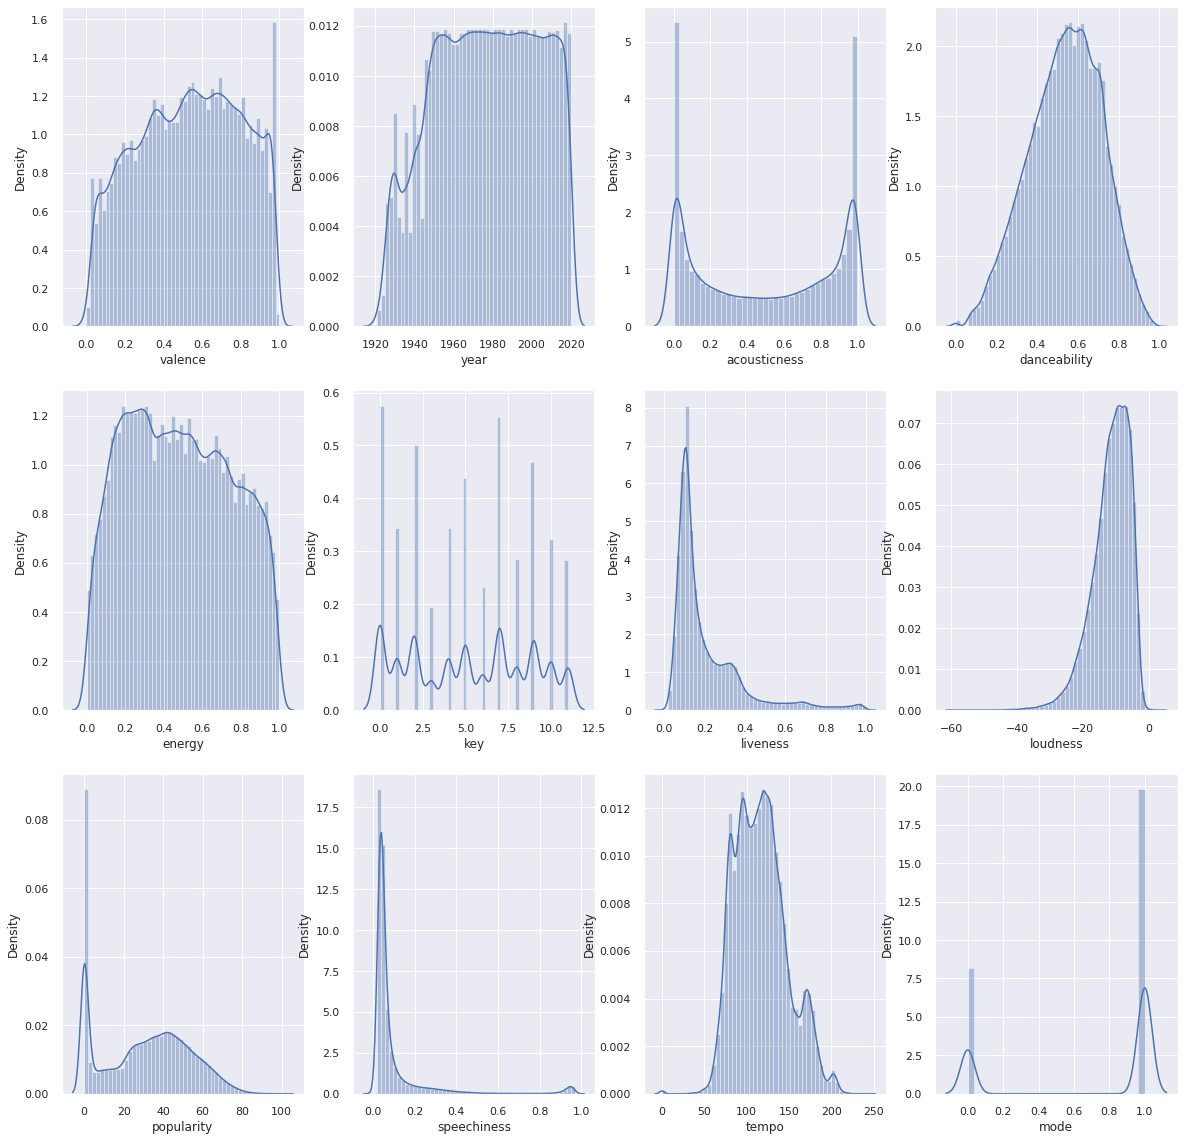

In [220]:
plt.rcParams.update({'font.size': 22})
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

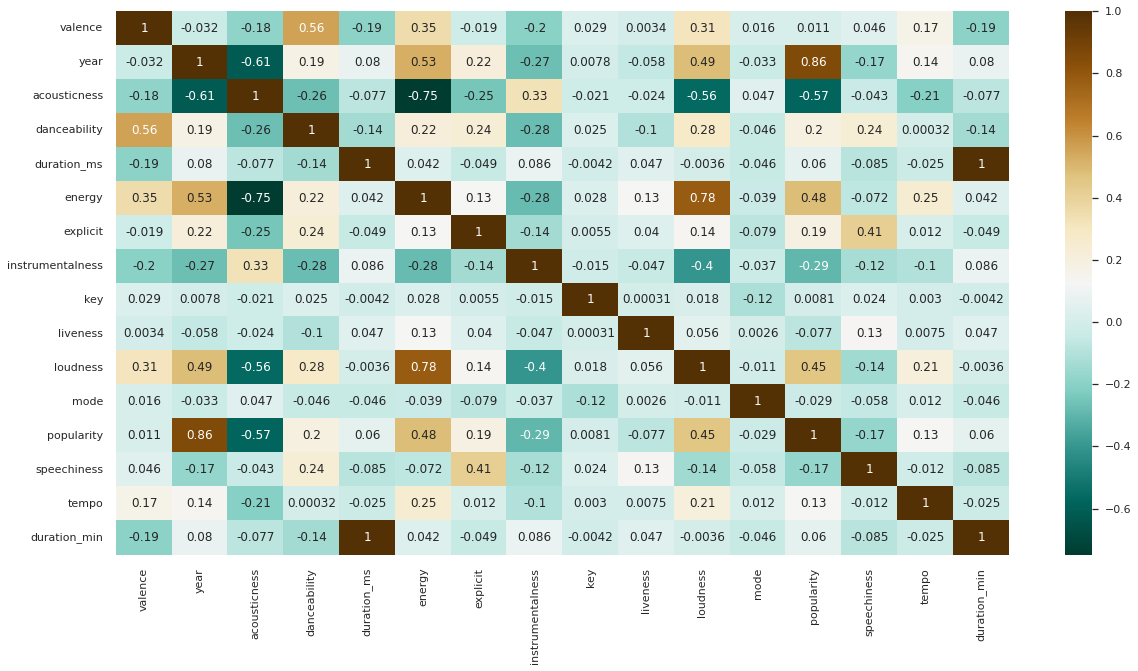

In [221]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

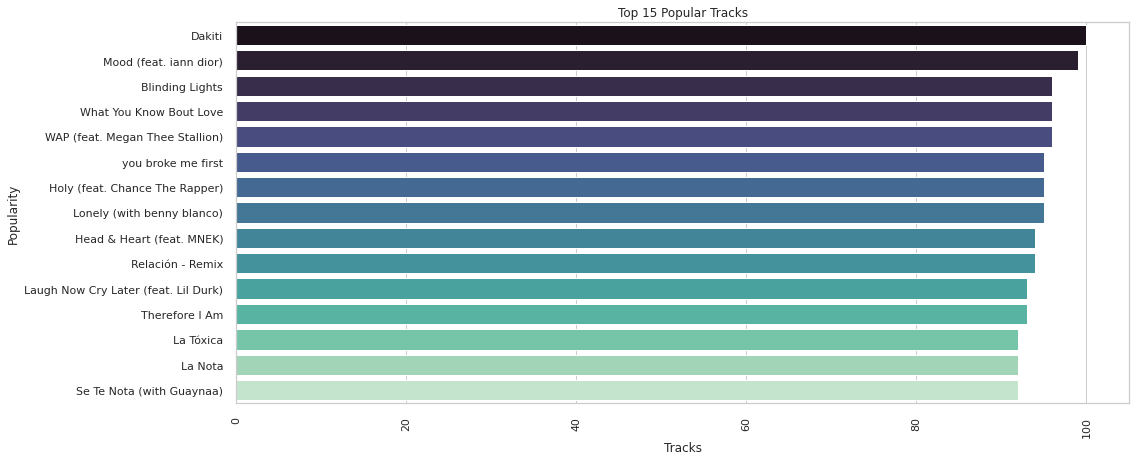

In [222]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [223]:
df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

name
Dakiti                                  100.0
Mood (feat. iann dior)                   99.0
Blinding Lights                          96.0
What You Know Bout Love                  96.0
WAP (feat. Megan Thee Stallion)          96.0
you broke me first                       95.0
Holy (feat. Chance The Rapper)           95.0
Lonely (with benny blanco)               95.0
Head & Heart (feat. MNEK)                94.0
Relación - Remix                         94.0
Laugh Now Cry Later (feat. Lil Durk)     93.0
Therefore I Am                           93.0
La Tóxica                                92.0
La Nota                                  92.0
Se Te Nota (with Guaynaa)                92.0
Name: popularity, dtype: float64

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

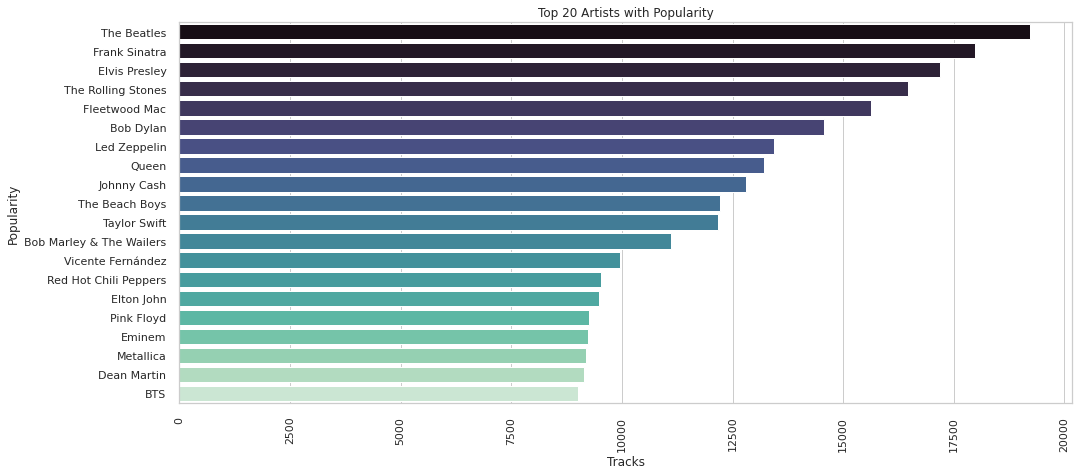

In [224]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

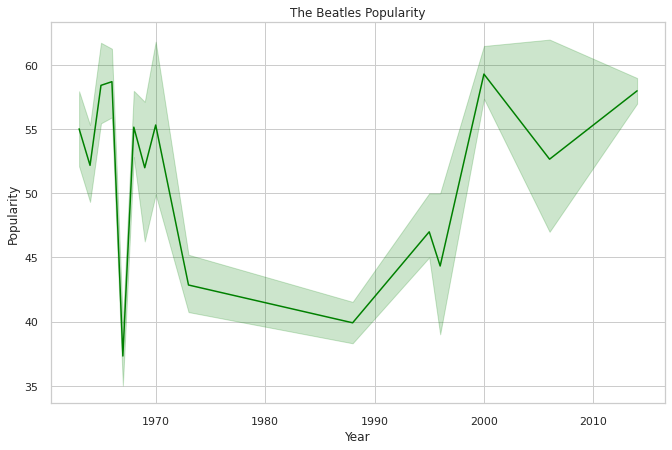

In [225]:
# visualize the popularity of The Beatles songs over the year
Beatles = df[df['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

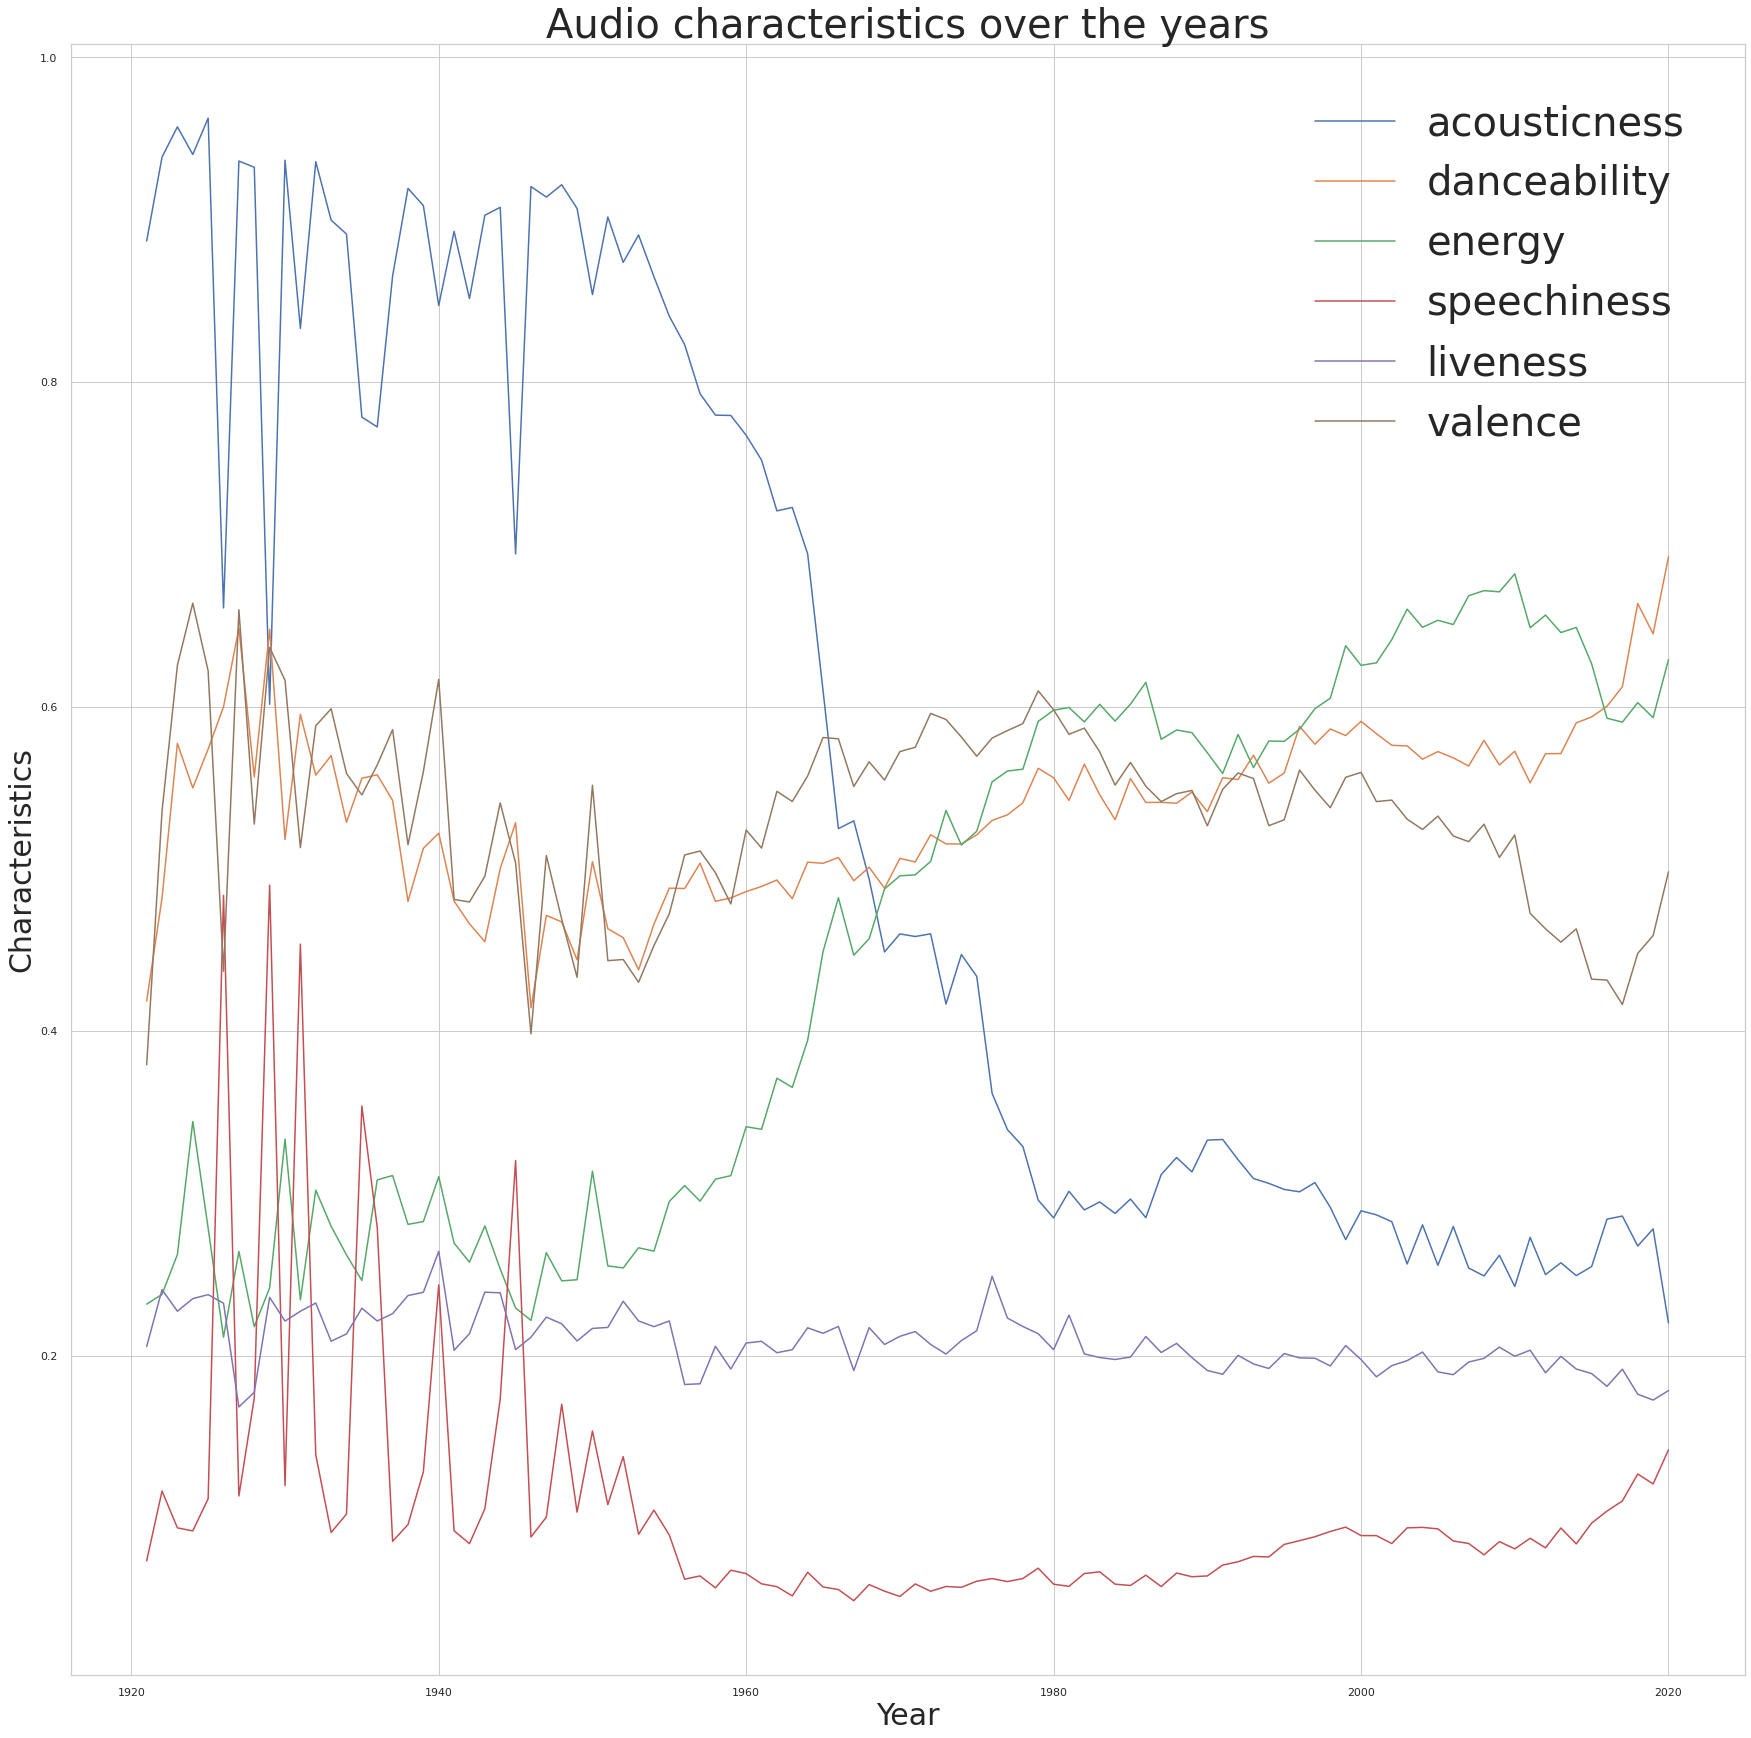

In [226]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

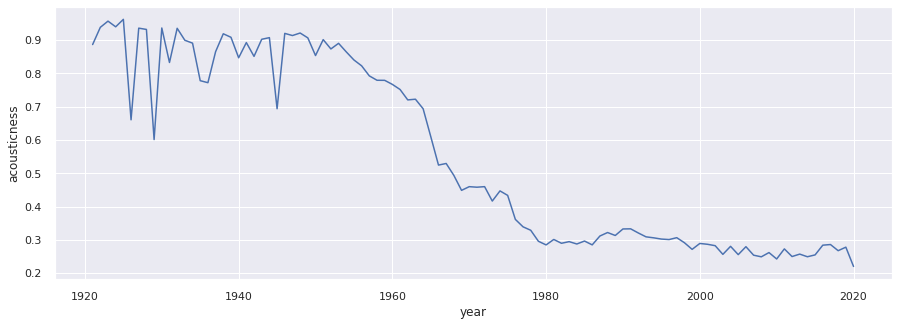

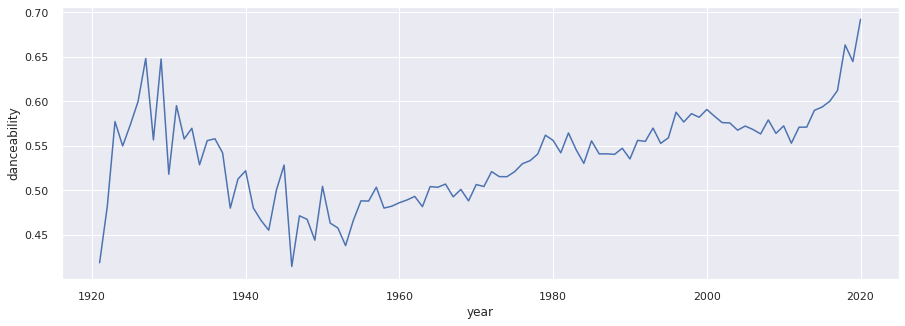

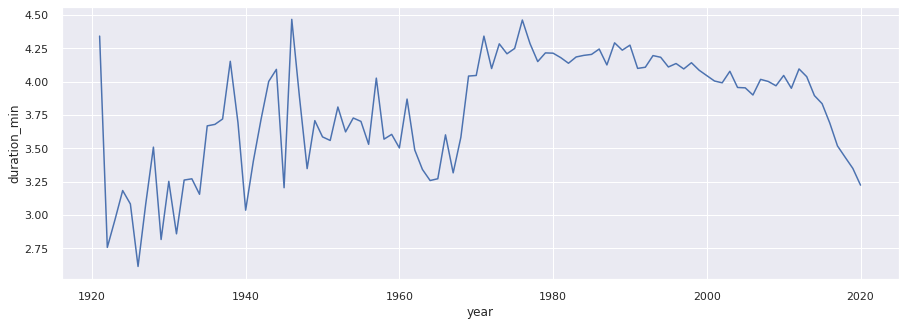

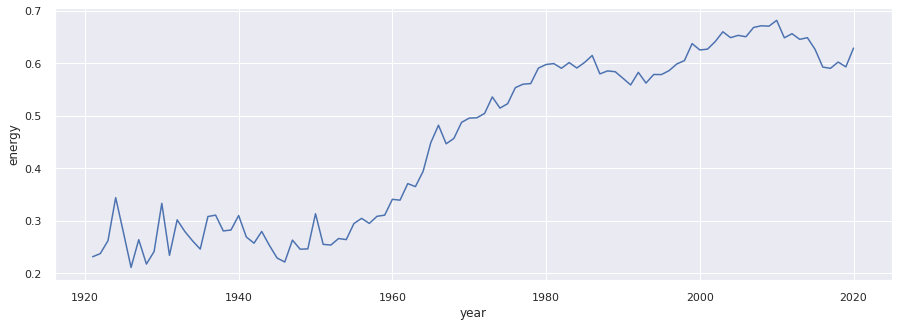

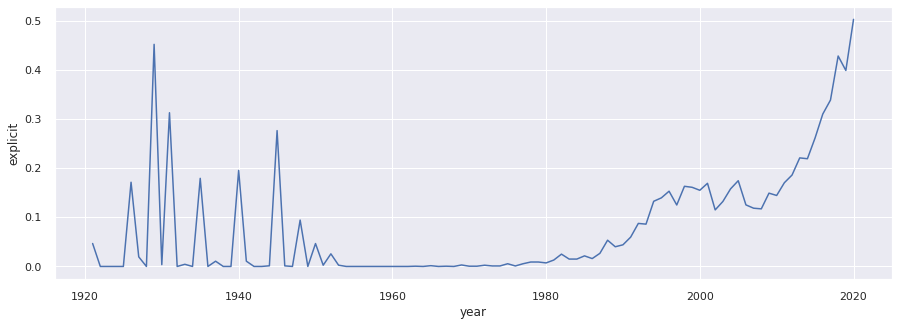

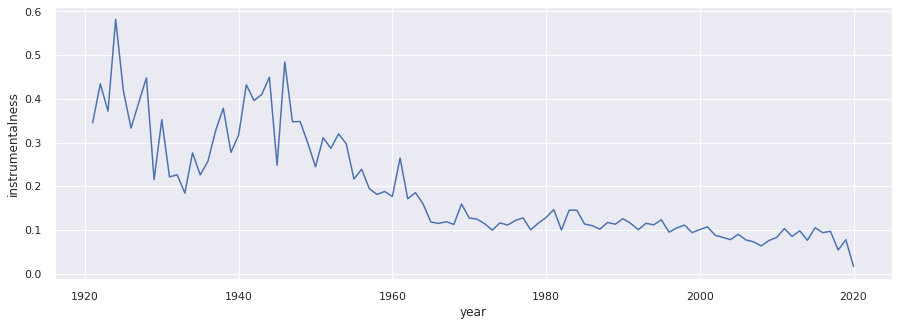

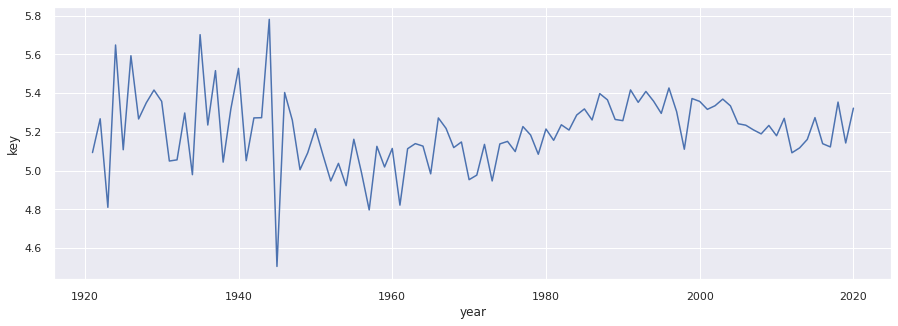

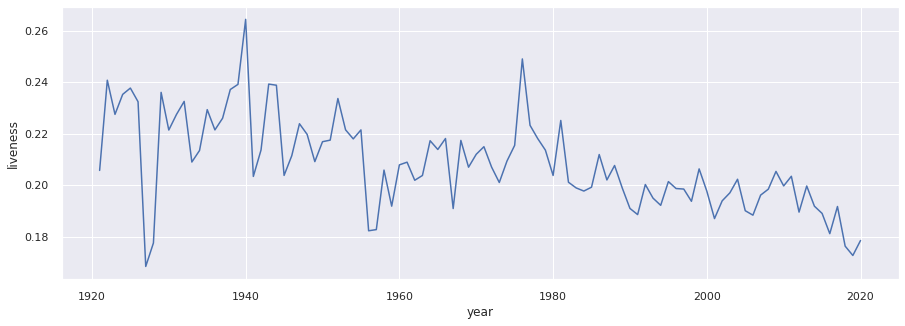

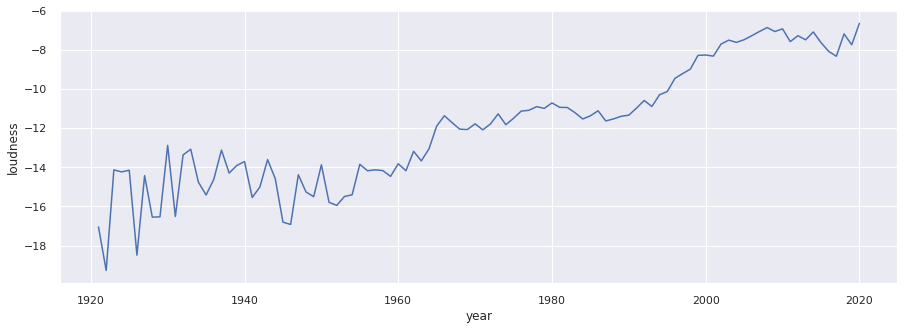

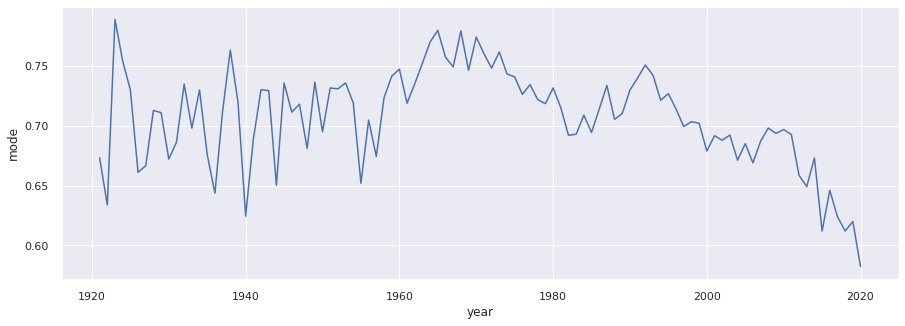

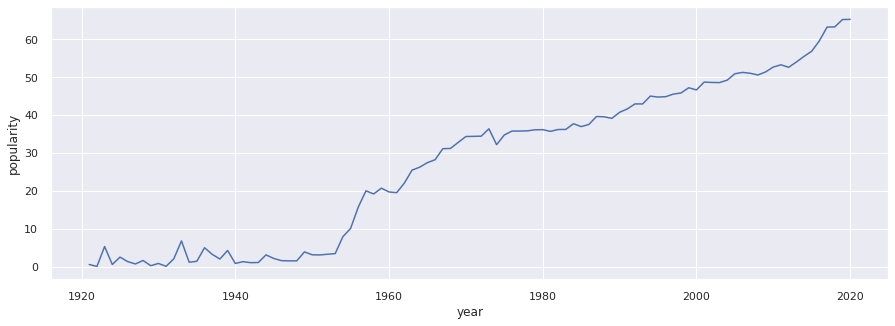

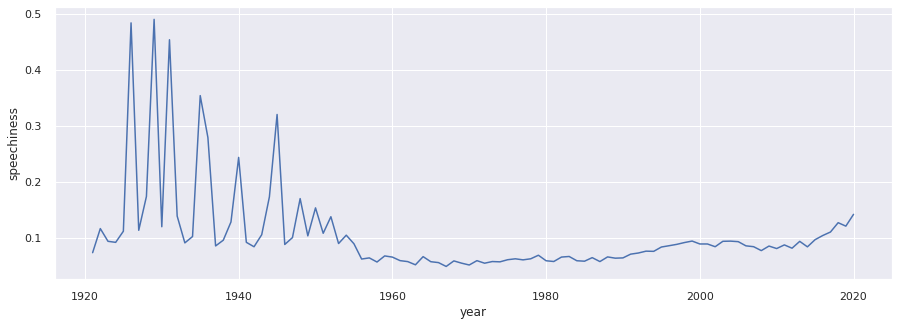

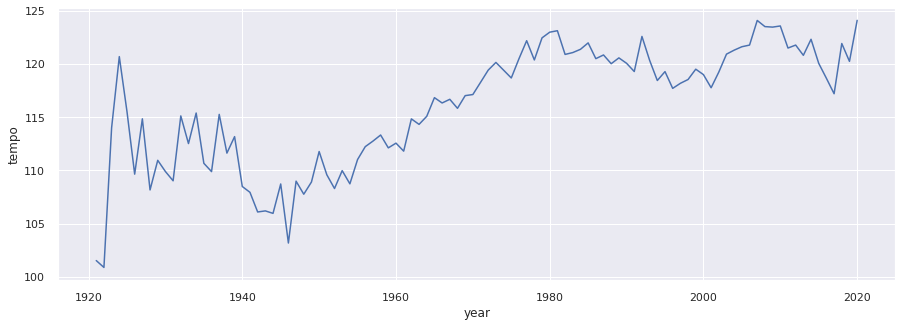

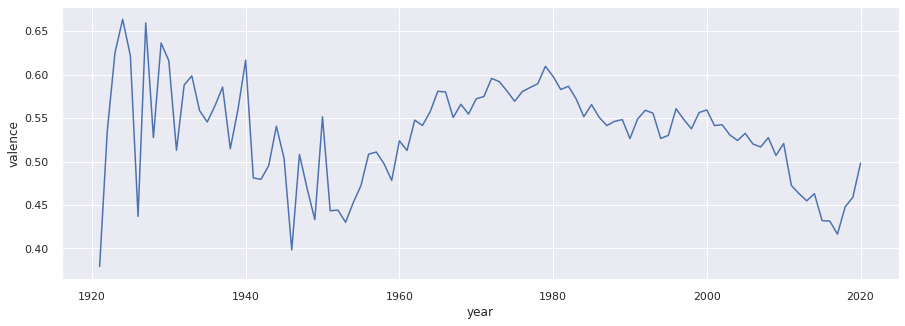

In [227]:
columns = ['acousticness','danceability', 'duration_min', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']
for col in columns:
    y = df.groupby('year')[col].mean()
    x = y.index
    plt.figure(figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.lineplot(x, y)

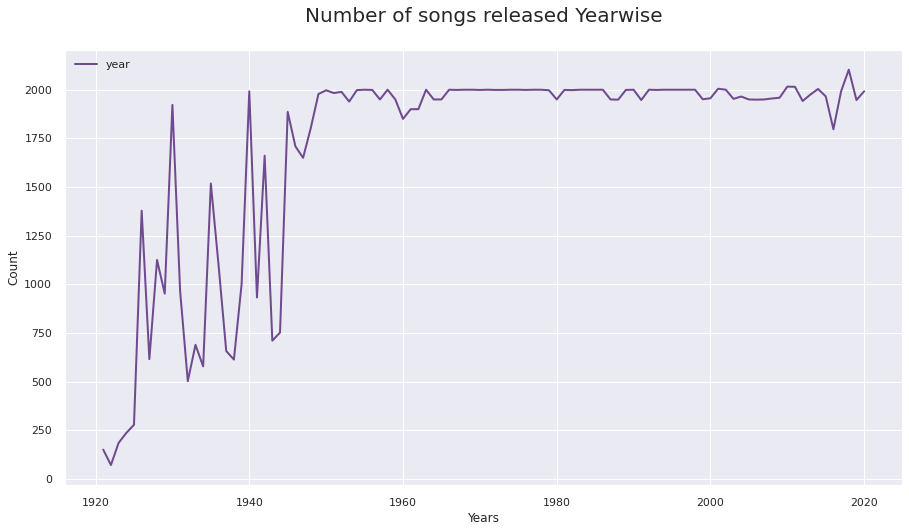

In [228]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

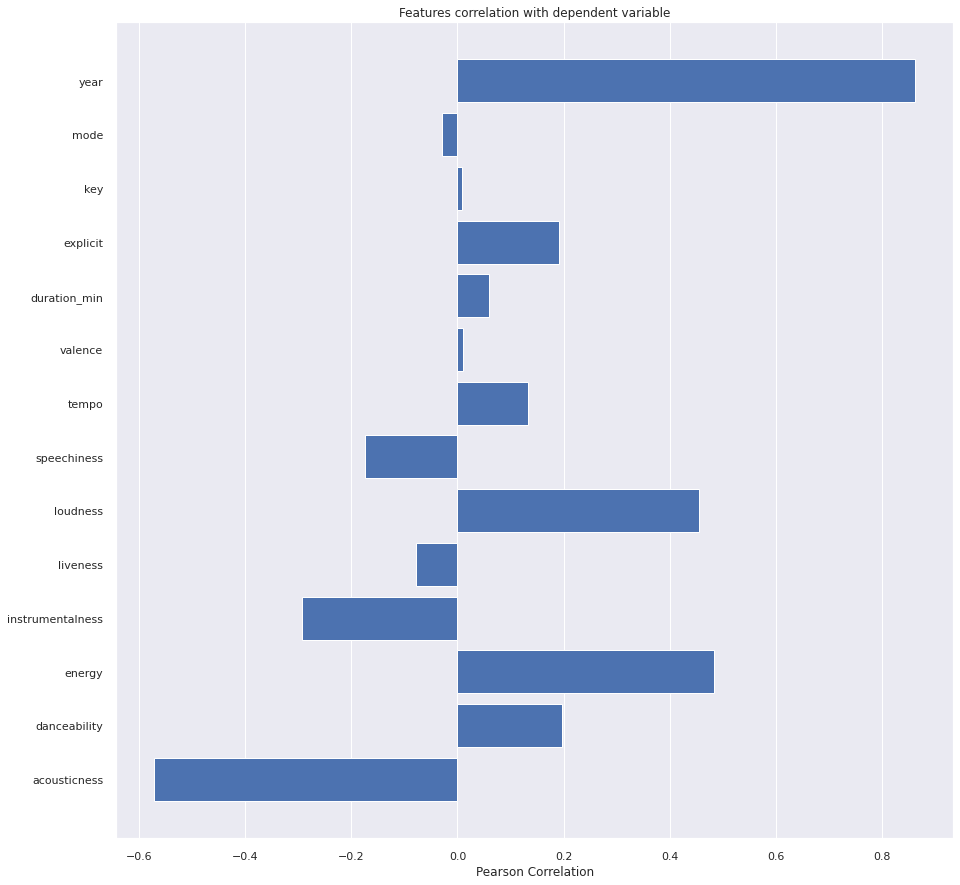

In [229]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(15,15)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

# Pre Processing

In [230]:
cols = list(pd.read_csv('DATA_DIR/data.csv', nrows =1))
df1 = pd.read_csv('DATA_DIR/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [231]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [232]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [233]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [234]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [235]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

#MinMaxScaler

In [236]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)

In [237]:
from sklearn.preprocessing import MinMaxScaler

# Veri kümesini yükleyin ve gereksiz sütunları silin
# Örneğin, "artist" ve "song_title" sütunları öneri sistemleri için gereksizdir
data = pd.read_csv("/content/DATA_DIR/data.csv")
data = data.drop(["artists","id"], axis=1)



#KMEANS

In [238]:
from sklearn.cluster import KMeans

# KMeans algoritmasını uygulayın
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Her veri örneğinin atanmış küme numarasını alın
labels = kmeans.labels_

# Her bir küme için merkez noktasını alın
centers = kmeans.cluster_centers_


In [240]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)

In [241]:
scaler = MinMaxScaler()
num = scaler.fit_transform(num)

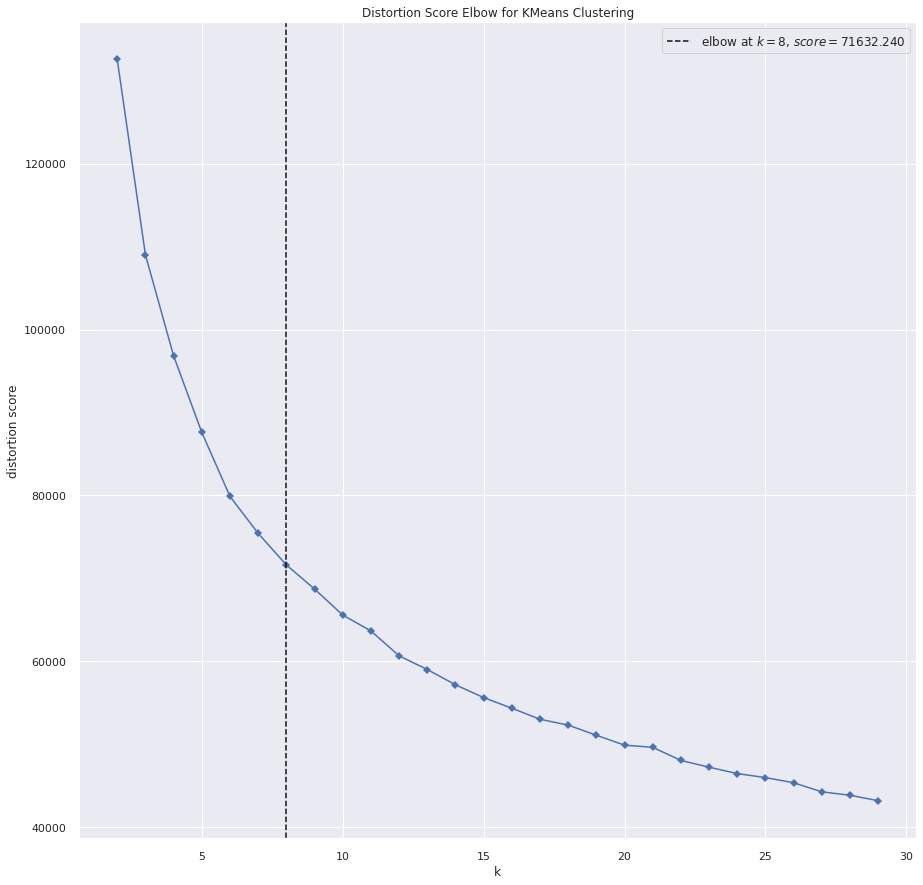

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7432e778e0>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(2, 30),
                 timings=False)

In [242]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=1),
                  num,
                  k=(2, 30),
                  timings=False)

In [243]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(num)
df['pred'] = kmeans.fit_predict(num)

In [244]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,pred
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.86,3
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.01,4
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339,8.33,3
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109,3.50,4
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.78,4


In [245]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,pred
0,0.0594,1921,0.98200,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.86,3
1,0.9630,1921,0.73200,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.01,4
2,0.0394,1921,0.96100,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339,8.33,3
3,0.1650,1921,0.96700,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109,3.50,4
4,0.2530,1921,0.95700,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.78,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029,5.03,5
170649,0.7340,2020,0.20600,Ashnikko,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936,2.51,5
170650,0.6370,2020,0.10100,MAMAMOO,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688,3.52,2
170651,0.1950,2020,0.00998,Eminem,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055,5.62,7


In [246]:
from scipy import spatial

def get_recommendations(df, song_name, n_top):
    columns = df.select_dtypes(include=num_types).columns
    distances = []
    #choosing the given song_name and dropping it from the data
    song = df[(df.name.str.lower() == song_name.lower())].head(1)
    rem_data = df[df.name.str.lower() != song_name.lower()]
    for index, r_song in tqdm(rem_data.iterrows(), total=rem_data.shape[0]):
        r_list = r_song[columns].values.flatten().tolist()
        s_list = song[columns].values.flatten().tolist()
        dist = spatial.distance.cosine(r_list, s_list)
        distances.append(dist)
    rem_data['distance'] = distances
    #sorting our data to be ascending by 'distance' feature
    rem_data = rem_data.sort_values('distance')
    columns = ['artists', 'name']
    return rem_data[columns][:n_top]

In [247]:
get_recommendations(df, 'Black Metal', 20)

100%|██████████| 170087/170087 [03:13<00:00, 878.96it/s] 


,artists,name
13709,Keith Whitley,When You Say Nothing at All
123560,Lincoln Brewster,There Is Power
55802,Kolton Moore & the Clever Few,Dear Mom
88986,Alan Silvestri,Seeing Is Believing
9391,Jimi Hendrix,Burning of the Midnight Lamp
55328,Lenny Cooper,Mud Digger Remix (feat. Colt Ford)
149319,Daryl Braithwaite,One Summer
146678,Francesco De Gregori,Rimmel
14581,Confederate Railroad,Daddy Never Was the Cadillac Kind
28350,The Meters,Stormy


In [248]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [249]:
recommender = Song_Recommender(df)
recommender.get_recommendations('Enter Sandman', 20)

100%|██████████| 170087/170087 [00:09<00:00, 17440.79it/s]


,artists,name
29548,Electric Light Orchestra,Fire On High
117239,Talking Heads,Psycho Killer - Live; 2004 Remaster
105295,Lynyrd Skynyrd,Red White & Blue
87318,PJ Harvey,To Bring You My Love
116962,Grace Jones,Breakdown
119161,"Babyface, Pebbles",Love Makes Things Happen (with Pebbles)
103648,Nine Inch Nails,The Becoming
33735,Kenny Lattimore,Never Too Busy
104872,American Head Charge,Just So You Know
88493,Michael Jackson,Break of Dawn


In [261]:
recommender.get_recommendations('canon in d', 10)


100%|██████████| 170083/170083 [00:12<00:00, 14112.85it/s]


,artists,name
169520,Baby Lullaby Academy,Rock a Bye Baby with Relaxing Ocean Waves for ...
70633,Misfits,Static Age
82418,Vashti Bunyan,Window Over The Bay
117558,"""Jerrys Kids""",I Don't Belong
149691,Fugazi,Greed
48121,Big Star,I'm In Love With A Girl
32266,Bad Religion,Suffer
133729,Minutemen,Don't Look Now
101682,"Misfits, Glenn Danzig",Static Age
45456,John D. Loudermilk,Language of Love


In [263]:
recommender.get_recommendations('dynamite', 10)


100%|██████████| 170081/170081 [00:10<00:00, 16468.13it/s]


,artists,name
123236,The Neighbourhood,Leaving Tonight
17468,Stealers Wheel,Stuck In The Middle With You
73387,Arctic Monkeys,Piledriver Waltz
138391,Fleet Foxes,Oliver James
54633,Seether,Rise Above This
167580,Los Rieleros Del Norte,Te Quiero Mucho
57080,Old Dominion,Never Be Sorry
155514,Dan + Shay,Take Me Home For Christmas
167546,New Edition,Hot 2 Nite
10722,"Earth, Wind & Fire",Sing a Song


In [264]:
recommender.get_recommendations('lovely', 10)


100%|██████████| 170084/170084 [00:09<00:00, 17615.27it/s]


,artists,name
73657,"Alejandro Fernández, Christina Aguilera",Hoy Tengo Ganas De Ti
17392,Musiq Soulchild,sobeautiful
166700,Hope Sandoval and the Warm Inventions,Suzanne
38004,Harry Styles,Only Angel
15271,La Tropa Vallenata,Los Caminos De La Vida
84908,Fleetwood Mac,Wish You Were Here - 2016 Remaster
91079,HELLYEAH,Moth
134587,Danger Danger,Feels Like Love
69577,Yngwie Malmsteen,Black Star
136402,Vico C,Aquel Que Habia Muerto


In [265]:
recommender.get_recommendations('lonely', 10)


100%|██████████| 170071/170071 [00:10<00:00, 16244.97it/s]


,artists,name
37329,Taylor Swift,Out Of The Woods
56065,Taylor Swift,Out Of The Woods
139742,P.M. Dawn,Set Adrift on Memory Bliss (Re-Recorded)
88169,Shaggy,Keep'n It Real
52107,Portishead,Numb
55414,Young the Giant,Apartment
88438,Default,Deny
54467,George Strait,How 'Bout Them Cowgirls
150683,Firehouse,Here for You
91465,A Boogie Wit da Hoodie,Friend Zone


In [266]:
recommender.get_recommendations('senorita', 10)


100%|██████████| 170087/170087 [00:10<00:00, 15884.10it/s]


,artists,name
165489,Aaliyah,No One Knows How to Love Me Quite Like You Do
104554,Korn,Wake Up
152285,"Charizma, Peanut Butter Wolf",Methods
105051,Grupo Bryndis,Mi Preciosa Mujer
148898,Münchener Freiheit,Ohne Dich (schlaf' ich heut Nacht nicht ein)
87082,John Michael Montgomery,Rope the Moon
36303,Blitzen Trapper,Furr
69562,Hawaiian Style Band,Love And Honesty
137435,George Strait,Desperately
32997,Arrested Development,Mr. Wendal


In [267]:
!pip install spotipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [268]:
!pip install --upgrade spotipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Spotify API yetkilendirme bilgileri
client_id = 'b863d74144ac488a8ae17d755cd14548'
client_secret = '8a3ee56f9cc04f09a563e7ed72618344'
redirect_uri = 'your_redirect_uri'

# Yetkilendirme işlemi
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Çalma listesi ID'si
playlist_id = '0akDfyCydrG9Pj8EKlyogh'

# Çalma listesi şarkılarını alma
results = sp.playlist_items(playlist_id=playlist_id, fields='items(track(name, artists(name)))')

# Şarkı adları ve sanatçılarını içeren bir liste oluşturma
songs = []
for item in results['items']:
    track = item['track']
    song_name = track['name']
    artist_names = [artist['name'] for artist in track['artists']]
    songs.append((song_name, artist_names))

# Liste verilerini bir dataframe'e dönüştürme
playlist_df = pd.DataFrame(songs, columns=['Song Name', 'Artist Names'])


In [270]:
for index, row in playlist_df.iterrows():
    print(f"Satır indeksi: {index}")
    print(f"Veriler: {row}")
    

Satır indeksi: 0
Veriler: Song Name               Criminal
Artist Names    [Britney Spears]
Name: 0, dtype: object
Satır indeksi: 1
Veriler: Song Name       Bu Havada Gidilmez
Artist Names          [Manuş Baba]
Name: 1, dtype: object
Satır indeksi: 2
Veriler: Song Name                        Bana Sor (Canlı)
Artist Names    [Cihan Mürtezaoğlu, Ceylan Ertem]
Name: 2, dtype: object
Satır indeksi: 3
Veriler: Song Name         Keklik Gibi
Artist Names    [Melek Mosso]
Name: 3, dtype: object
Satır indeksi: 4
Veriler: Song Name       Tutuşmuş Beraber
Artist Names      [Melike Şahin]
Name: 4, dtype: object
Satır indeksi: 5
Veriler: Song Name          Bir Beyaz Orkide
Artist Names    [Cihan Mürtezaoğlu]
Name: 5, dtype: object
Satır indeksi: 6
Veriler: Song Name           Gözlerine
Artist Names    [Mabel Matiz]
Name: 6, dtype: object
Satır indeksi: 7
Veriler: Song Name              Papatya
Artist Names    [Hirai Zerdüş]
Name: 7, dtype: object
Satır indeksi: 8
Veriler: Song Name       Yansın İst

In [271]:
playlist_df

,Song Name,Artist Names
0,Criminal,[Britney Spears]
1,Bu Havada Gidilmez,[Manuş Baba]
2,Bana Sor (Canlı),"[Cihan Mürtezaoğlu, Ceylan Ertem]"
3,Keklik Gibi,[Melek Mosso]
4,Tutuşmuş Beraber,[Melike Şahin]
...,...,...
95,Ankara'yla Bozuşuruz,[Perdenin Ardındakiler]
96,Tutuşmuş Beraber - Vp Remix,"[Melike Şahin, Virtupollo]"
97,Hatıralarım,[Perdenin Ardındakiler]
98,Sevsem,[Kahraman Deniz]


In [272]:
# sanatçı adlarını birleştiren bir lambda fonksiyonu tanımlayın
combine_artists = lambda lst: ','.join(lst)

# sanatçı adlarını birleştirin
playlist_df['artists_combined'] = playlist_df['Artist Names'].apply(combine_artists)

# her satırı döngüye alın
for index, row in playlist_df.iterrows():
    song_name = row['Song Name']
    artist_name = combine_artists(row['Artist Names'])

    song = playlist_df[(playlist_df['Song Name'].str.lower() == song_name.lower()) & (playlist_df['artists_combined'].str.lower().str.contains(artist_name.lower()))].head(1)

    # ... diğer işlemler ...
    if not song.empty:
        print(song)


  Song Name      Artist Names artists_combined
0  Criminal  [Britney Spears]   Britney Spears
            Song Name  Artist Names artists_combined
1  Bu Havada Gidilmez  [Manuş Baba]       Manuş Baba
          Song Name                       Artist Names  \
2  Bana Sor (Canlı)  [Cihan Mürtezaoğlu, Ceylan Ertem]   

                 artists_combined  
2  Cihan Mürtezaoğlu,Ceylan Ertem  
     Song Name   Artist Names artists_combined
3  Keklik Gibi  [Melek Mosso]      Melek Mosso
          Song Name    Artist Names artists_combined
4  Tutuşmuş Beraber  [Melike Şahin]     Melike Şahin
          Song Name         Artist Names   artists_combined
5  Bir Beyaz Orkide  [Cihan Mürtezaoğlu]  Cihan Mürtezaoğlu
   Song Name   Artist Names artists_combined
6  Gözlerine  [Mabel Matiz]      Mabel Matiz
  Song Name    Artist Names artists_combined
7   Papatya  [Hirai Zerdüş]     Hirai Zerdüş
         Song Name  Artist Names artists_combined
8  Yansın İstanbul  [Sezen Aksu]       Sezen Aksu
      Song 

In [273]:
playlist_df

,Song Name,Artist Names,artists_combined
0,Criminal,[Britney Spears],Britney Spears
1,Bu Havada Gidilmez,[Manuş Baba],Manuş Baba
2,Bana Sor (Canlı),"[Cihan Mürtezaoğlu, Ceylan Ertem]","Cihan Mürtezaoğlu,Ceylan Ertem"
3,Keklik Gibi,[Melek Mosso],Melek Mosso
4,Tutuşmuş Beraber,[Melike Şahin],Melike Şahin
...,...,...,...
95,Ankara'yla Bozuşuruz,[Perdenin Ardındakiler],Perdenin Ardındakiler
96,Tutuşmuş Beraber - Vp Remix,"[Melike Şahin, Virtupollo]","Melike Şahin,Virtupollo"
97,Hatıralarım,[Perdenin Ardındakiler],Perdenin Ardındakiler
98,Sevsem,[Kahraman Deniz],Kahraman Deniz


In [274]:
dummies = pd.get_dummies(playlist_df['Song Name'])

playlist_df = pd.concat([playlist_df, dummies], axis=1)


In [275]:
def get_similar_songs(song_name):
    # seçilen şarkının benzerlik skorlarını hesaplamak için gerekli verileri alın
    song_index = playlist_df[playlist_df['Song Name'] == song_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[song_index]))

    # benzerlik skorlarını yüksekten düşüğe doğru sıralayın
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # en benzer 10 şarkıyı seçin
    top_songs = similarity_scores[1:11]

    # seçilen şarkılar için adları ve benzerlik skorlarını içeren bir sözlük oluşturun
    similar_songs = {}
    for i, score in top_songs:
        similar_songs[playlist_df.iloc[i]['Song Name']] = score

    return similar_songs


In [276]:
from sklearn.metrics.pairwise import cosine_similarity

# özellik matrisini oluşturun
features = playlist_df.drop(['Song Name', 'Artist Names', 'artists_combined'], axis=1)
data = features.values

# benzerlik matrisini hesaplayın
similarity_matrix = cosine_similarity(data)

# seçilen şarkının benzerlik skorlarını alın
song_index = playlist_df[playlist_df['Song Name'] == song_name].index[0]
similarities = list(enumerate(similarity_matrix[song_index]))

# benzerlik skorlarına göre sıralayın
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

# ilk 10 benzer şarkıyı seçin
top_similar_songs = []
for i in range(1, 11):
    song_index = sorted_similarities[i][0]
    song_name = playlist_df.iloc[song_index]['Song Name']
    artist_name = playlist_df.iloc[song_index]['artists_combined']
    similarity_score = sorted_similarities[i][1]
    top_similar_songs.append((song_name, artist_name, similarity_score))
    
# sonuçları yazdırın
for song in top_similar_songs:
    print(f"Song Name: {song[0]}")
    print(f"Artist: {song[1]}")
    print(f"Similarity Score: {song[2]}")
    print("\n")


Song Name: Criminal
Artist: Britney Spears
Similarity Score: 0.0


Song Name: Bu Havada Gidilmez
Artist: Manuş Baba
Similarity Score: 0.0


Song Name: Bana Sor (Canlı)
Artist: Cihan Mürtezaoğlu,Ceylan Ertem
Similarity Score: 0.0


Song Name: Keklik Gibi
Artist: Melek Mosso
Similarity Score: 0.0


Song Name: Tutuşmuş Beraber
Artist: Melike Şahin
Similarity Score: 0.0


Song Name: Bir Beyaz Orkide
Artist: Cihan Mürtezaoğlu
Similarity Score: 0.0


Song Name: Gözlerine
Artist: Mabel Matiz
Similarity Score: 0.0


Song Name: Papatya
Artist: Hirai Zerdüş
Similarity Score: 0.0


Song Name: Yansın İstanbul
Artist: Sezen Aksu
Similarity Score: 0.0


Song Name: Kefen Giydim
Artist: Pinhani
Similarity Score: 0.0


